In [1]:
import numpy
import sys
sys.path.append('../../main/regression/')
import scipy.io
import biasVarModelAvg

#### To Be Specified
filename = 'NB_n=100000_d=500.mat' 

# load data
dataname = filename[0:2]
dataDict = scipy.io.loadmat(filename)
matX = dataDict['matX']
vecW = dataDict['vecW']
print(matX.shape)
matU, vecS, matV = numpy.linalg.svd(matX, full_matrices=False)

(100000, 500)


In [ ]:
s = 2000
gamma = 1e-12
xi = 0.1
vecG = [1, 2, 3, 4, 6, 8, 10, 12, 15, 18, 22, 26, 30, 35, 40, 45, 50]
method = 'hat'

resultDict = biasVarModelAvg.bvExperiment(matX, vecW, s, gamma, xi, vecG, method)
print(resultDict)

outputFileName = 'avg_' + method +'_' + dataname + '_s' + str(s) + '_gam' + str(gamma) + '.mat'
scipy.io.savemat(outputFileName, resultDict)


Doing uniform sampling...
iteration 0


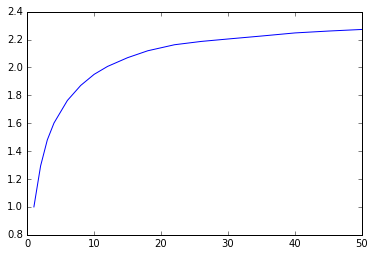

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

result = resultDict['biasSrft']
plt.plot(resultDict['g'], result[0] / result)
plt.show()

In [47]:
matVW0 = numpy.dot(matV, vecW)
gamma = 1e-12
xi = 0.1
bias, var = bvAvgHat(vecS, matU, matVW0, gamma, xi, 'srft', 2000, 1)
print(bias ** 2)
print(var)

1.37195419192e-05
4.24994331919e-05


In [48]:

bias, var = bvAvgHat(vecS, matU, matVW0, gamma, xi, 'srft', 2000, 4)
print(bias ** 2)
print(var)

5.25404861186e-06
3.83116132291e-05


In [49]:

bias, var = bvAvgHat(vecS, matU, matVW0, gamma, xi, 'srft', 2000, 8)
print(bias ** 2)
print(var)

3.26710178337e-06
3.74747604589e-05


In [4]:
vecG = [1, 2, 3, 4, 6, 8, 12, 16, 20, 25, 30]
setG = set(vecG)
2 + 2 in setG

True

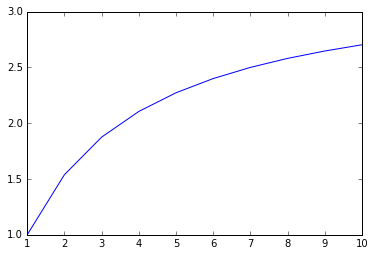

In [12]:
g = numpy.array(range(10)) + 1
eta = 0.3
y = eta / g + eta ** 2 / (1-eta)

plt.plot(g, y[0] / y)
plt.show()